<a href="https://colab.research.google.com/github/OmarEscuela/omar/blob/master/Tarea_4_Red_densa_en_Keras_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.001
epochs = 30
batch_size = 120

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255
x_testv /= 255 # tenía un error

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])

In [5]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
500/500 [==============================] - 5s 8ms/step - loss: 2.2706 - accuracy: 0.2074 - val_loss: 2.2177 - val_accuracy: 0.3267
Epoch 2/30
500/500 [==============================] - 4s 8ms/step - loss: 2.1790 - accuracy: 0.3855 - val_loss: 2.1331 - val_accuracy: 0.4572
Epoch 3/30
500/500 [==============================] - 5s 10ms/step - loss: 2.0980 - accuracy: 0.4905 - val_loss: 2.0522 - val_accuracy: 0.5432
Epoch 4/30
500/500 [==============================] - 4s 8ms/step - loss: 2.0201 - accuracy: 0.5640 - val_loss: 1.9749 - val_accuracy: 0.6232
Epoch 5/30
500/500 [==============================] - 4s 7ms/step - loss: 1.9454 - accuracy: 0.6236 - val_loss: 1.8997 - val_accuracy: 0.6419
Epoch 6/30
500/500 [==============================] - 5s 10ms/step - loss: 1.8734 - accuracy: 0.6564 - val_loss: 1.8280 - val_accuracy: 0.6788
Epoch 7/30
500/500 [==============================] - 4s 7ms/step - loss: 1.8040 - accuracy: 0.6817 - val_loss: 1.7590 - val_accuracy: 0.7118
Epoc

Recreamos la red como la básica que teníamos

In [6]:
learning_rate = 0.07 # La original la corrí con los siguientes valores
epochs = 15
batch_size = 10

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])
inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")
# La primer red (basica) me dió un 72% de efectividad en 135,5 s

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2137 - accuracy: 0.6998 - val_loss: 0.1390 - val_accuracy: 0.8473
Epoch 2/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1159 - accuracy: 0.8608 - val_loss: 0.0955 - val_accuracy: 0.8855
Epoch 3/15
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0885 - accuracy: 0.8856 - val_loss: 0.0784 - 


1er Experimento:

    Cambiamos la función de activación (Sigmoide -> Relu)
    Aumentamos las neuronas ocultas (50).
    Disminuimos el tamaño del LearningRate (0.07 -> 0.001)
    También se aumentó el tamaño del minibatch. (10 -> 70)
    Neuronas de capa oculta: 50


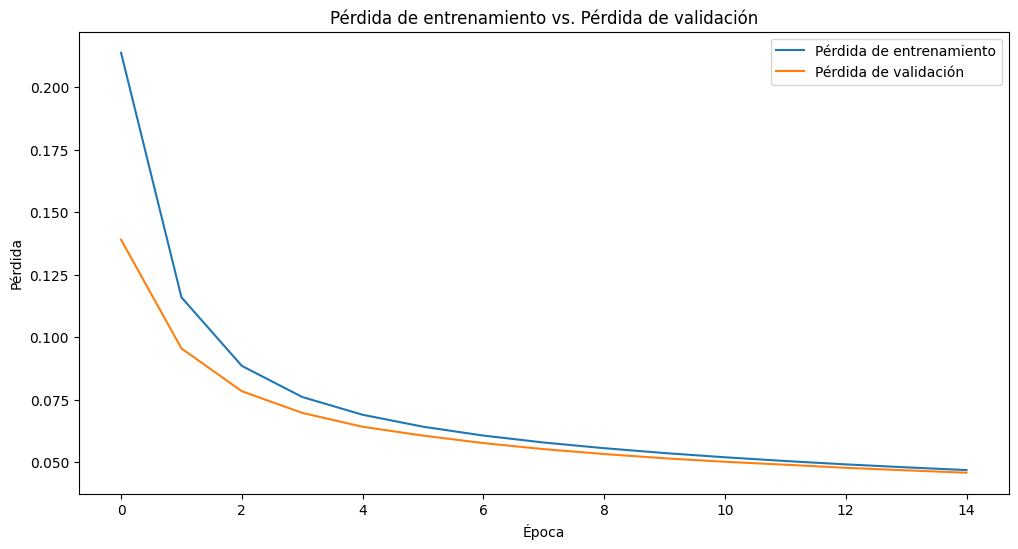

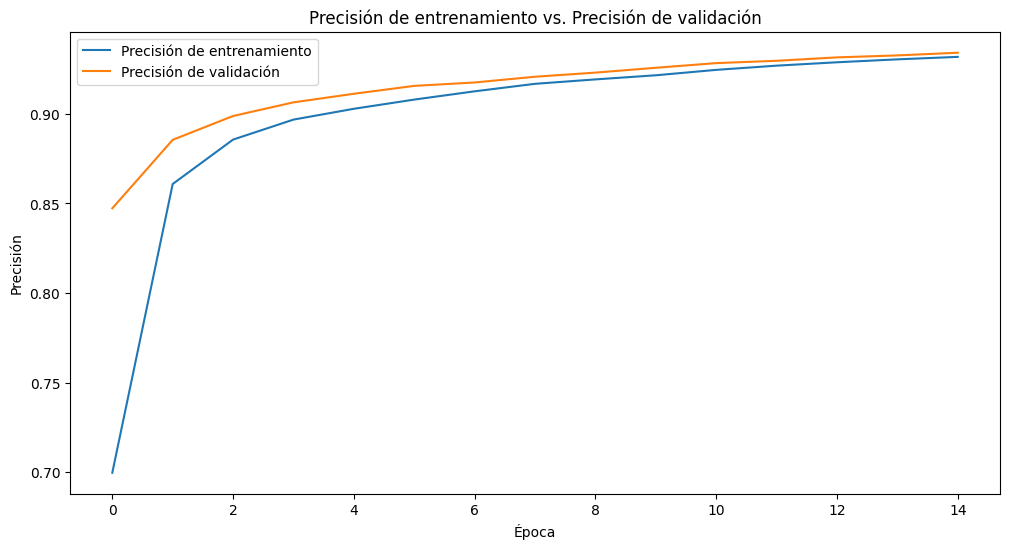

In [7]:
# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()


2er Experimento:

    Función para la capa oculta: relu.
    Neuronas ocultas: 100
    Incrementamos el tamaño del LearningRate (0.001 -> 0.01)
    Se aumentaron las epocas (15 ->20)
    Dismunimos el tamaño del minibatch. (70 -> 30)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2842 - accuracy: 0.5580 - val_loss: 0.2093 - val_accuracy: 0.7684
Epoch 2/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1786 - accuracy: 0.7936 - val_loss: 0.1506 - val_accuracy: 0.8278
Epoch 3/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1393 - accuracy: 0.8345 - val_loss: 0.1243 - v

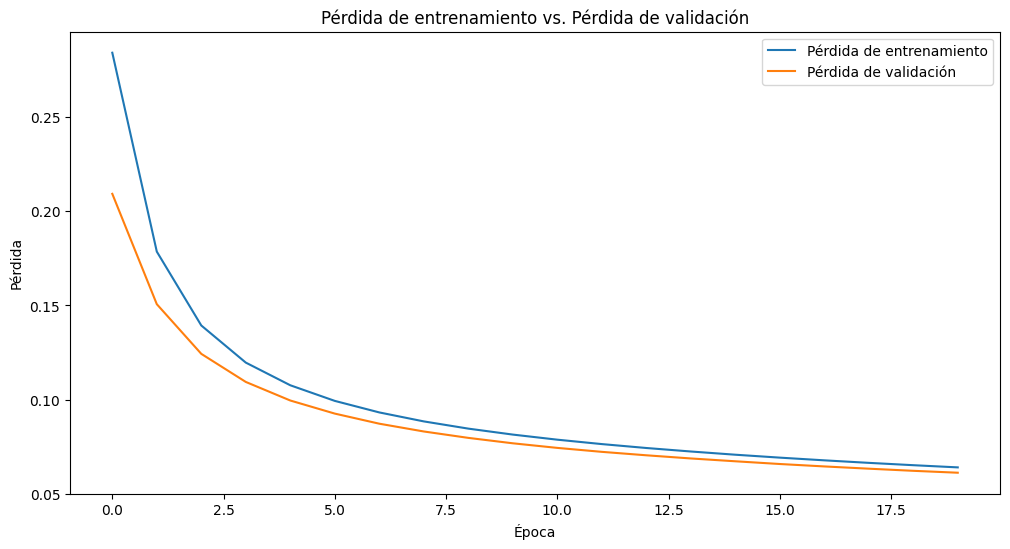

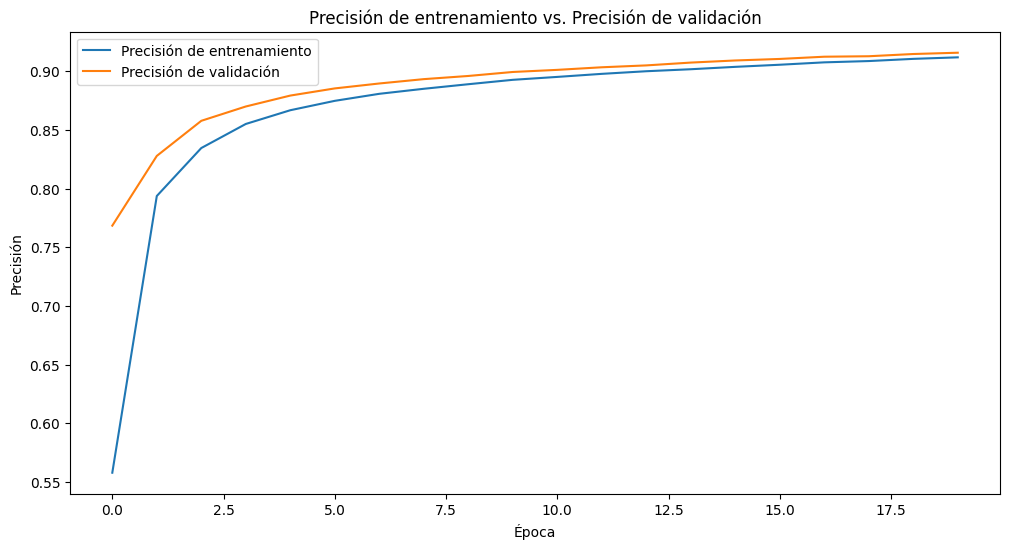

In [9]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 50

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()


3er Experimento:

    Función para la capa oculta: relu.
    Neuronas ocultas: 50
    Optimizado con Adam



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                39250     
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2294 - accuracy: 0.7018 - val_loss: 0.1295 - val_accuracy: 0.8672
Epoch 2/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.8722 - val_loss: 0.0898 - val_accuracy: 0.8935
Epoch 3/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.8932 - val_loss: 0.0740 - v

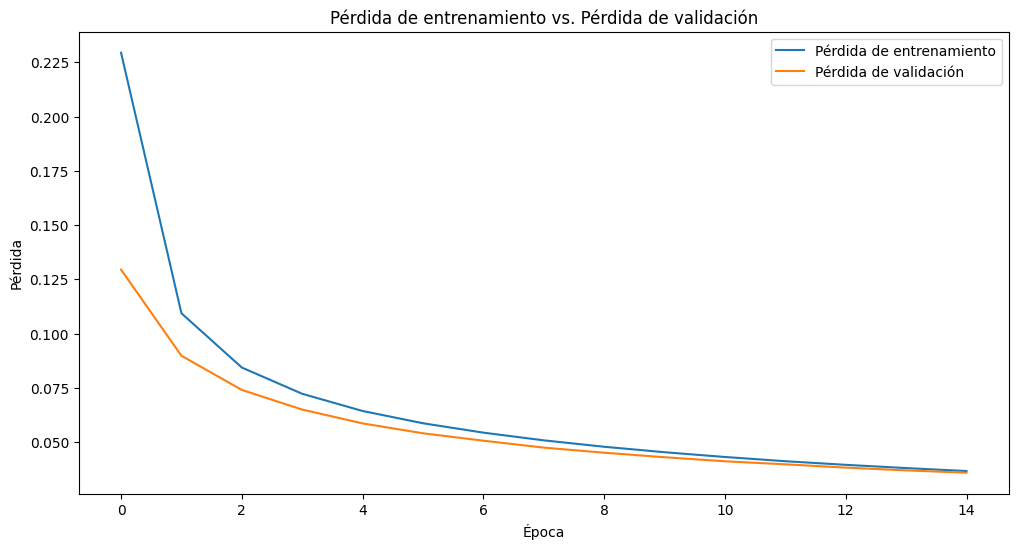

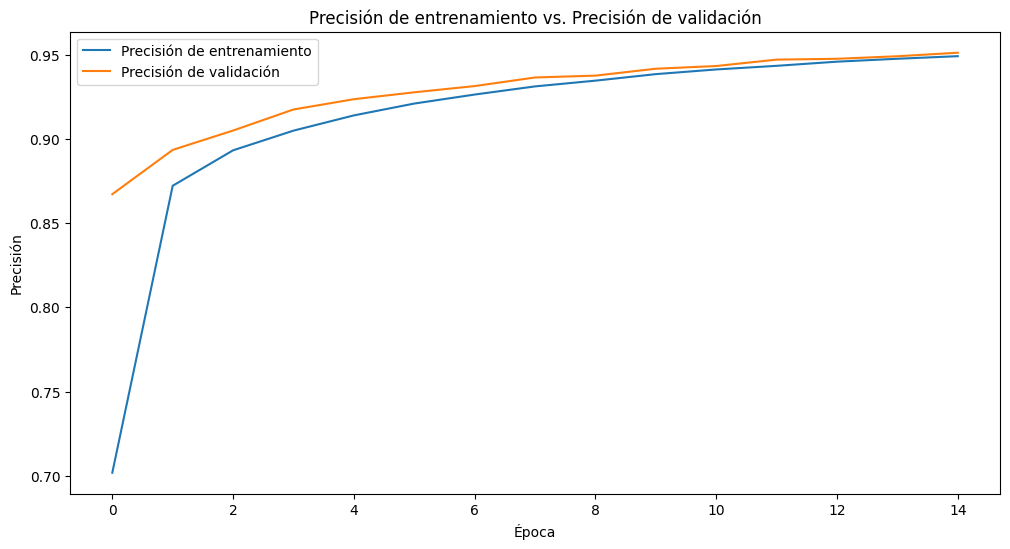

In [10]:
learning_rate = 0.0001
epochs = 15
batch_size = 50
# neuronas = 50

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()


Regularizaciones y DropOut

Usaremos el modelo del Experimento de Optimización II donde pusimos el Adam. Se ocupará este modelo para que sean más evidentes las regularizaciones.
Regularización L1

In [11]:
from keras import regularizers

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.3818 - accuracy: 0.5767 - val_loss: 1.2263 - val_accuracy: 0.6783
Epoch 2/20
2000/2000 [==============================] - 7s 4ms/step - loss: 1.2499 - accuracy: 0.6690 - val_loss: 1.2355 - val_accuracy: 0.7409
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.2306 - accuracy: 0.6811 - val_loss: 1.2450 - v

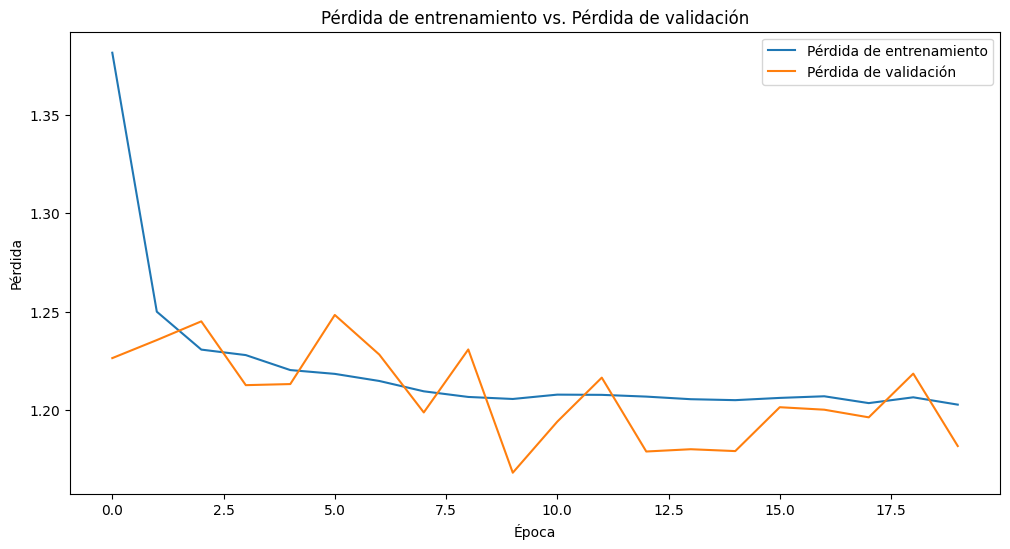

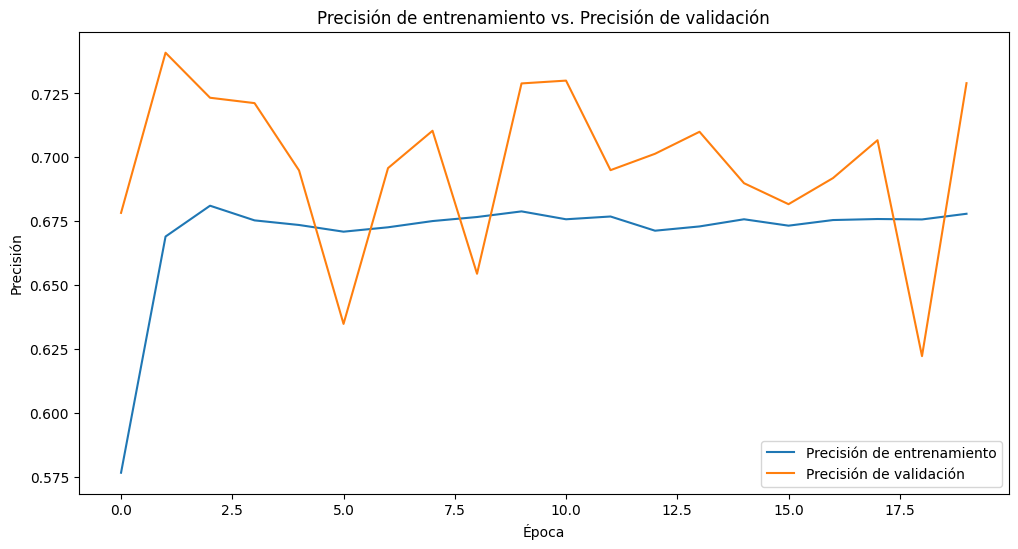

In [12]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 100

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

Regularización L2

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2098 - accuracy: 0.7793 - val_loss: 0.1598 - val_accuracy: 0.8460
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1685 - accuracy: 0.8181 - val_loss: 0.1582 - val_accuracy: 0.8177
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1634 - accuracy: 0.8219 - val_loss: 0.1447 - v

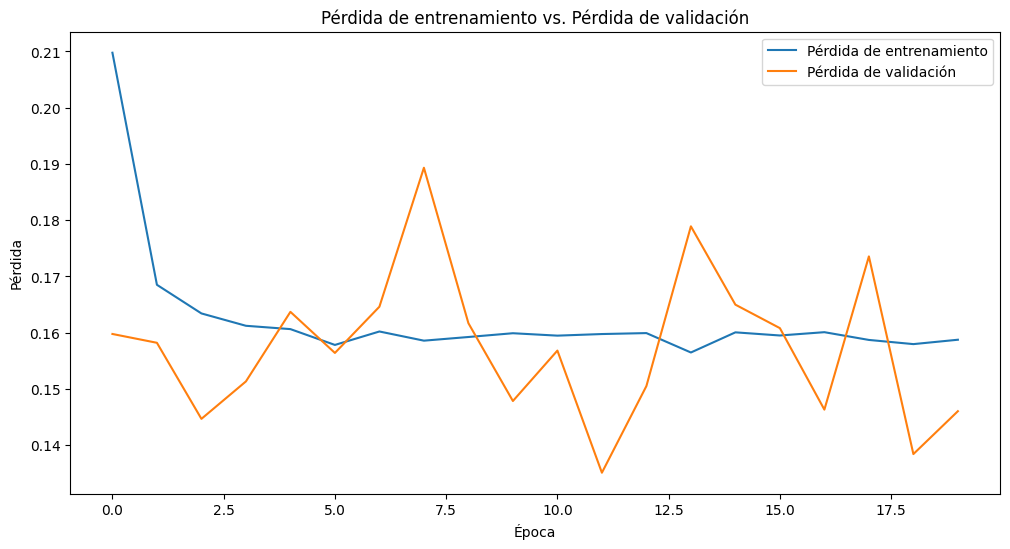

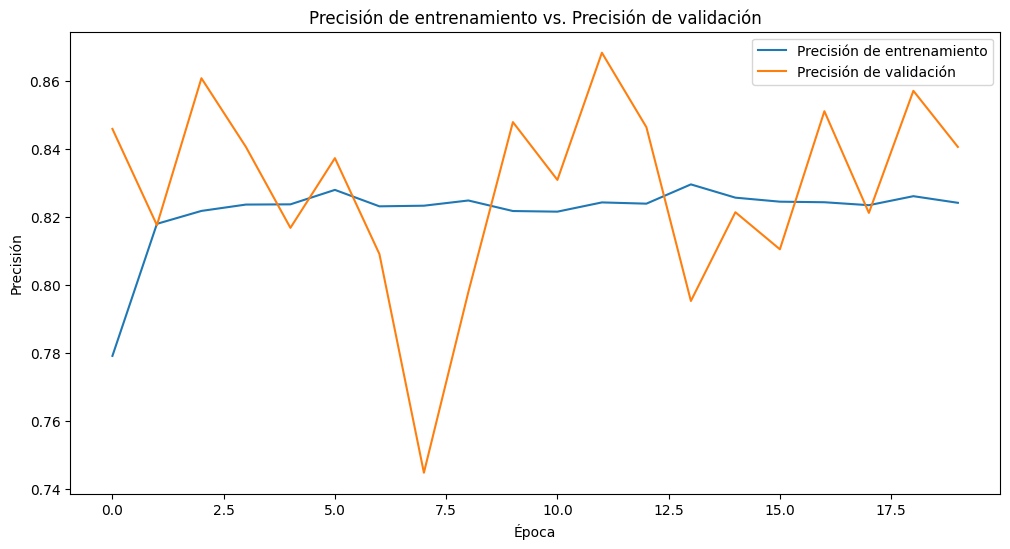

In [13]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 100

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()


Regularización L1-L2

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.4166 - accuracy: 0.5565 - val_loss: 1.2614 - val_accuracy: 0.7059
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.2780 - accuracy: 0.6759 - val_loss: 1.2308 - val_accuracy: 0.7204
Epoch 3/20
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2714 - accuracy: 0.6784 - val_loss: 1.2404 - v

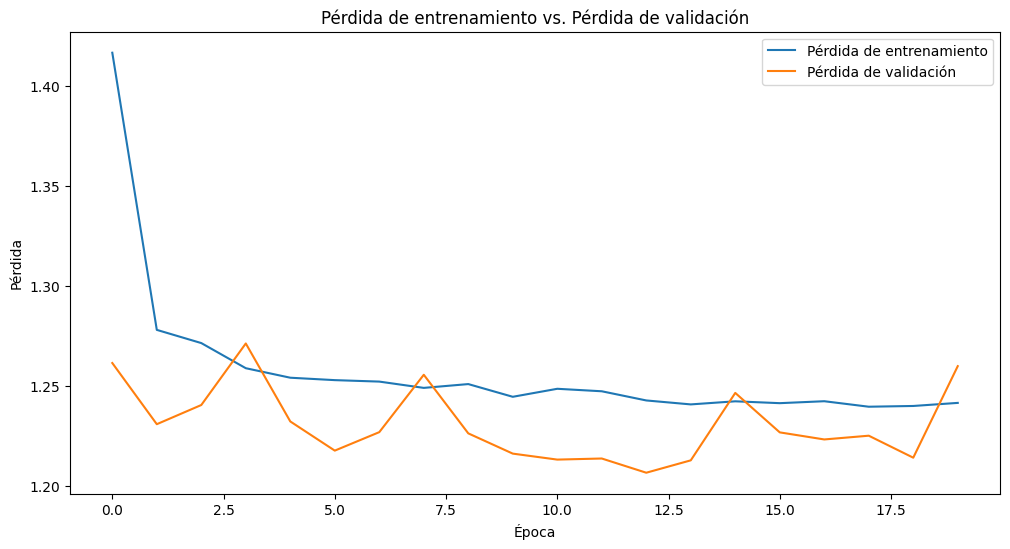

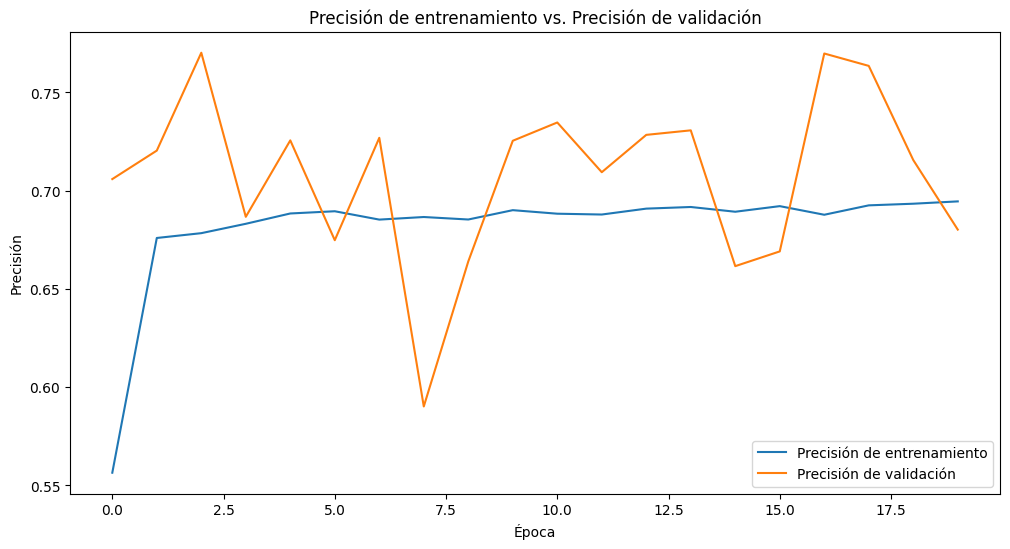

In [14]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 100

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

DropOut y Regularización L1-L2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 8s 4ms/step - loss: 1.5085 - accuracy: 0.2831 - val_loss: 1.3868 - val_accuracy: 0.4768
Epoch 2/20
2000/2000 [==============================] - 7s 3ms/step - loss: 1.3533 - accuracy: 0.2945 - val_loss: 1.2988 - val_accuracy:

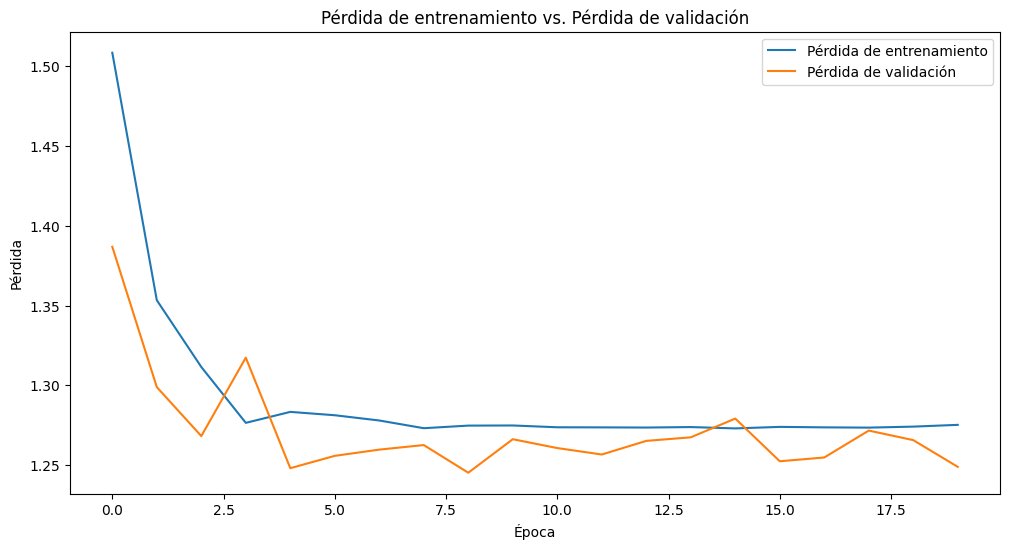

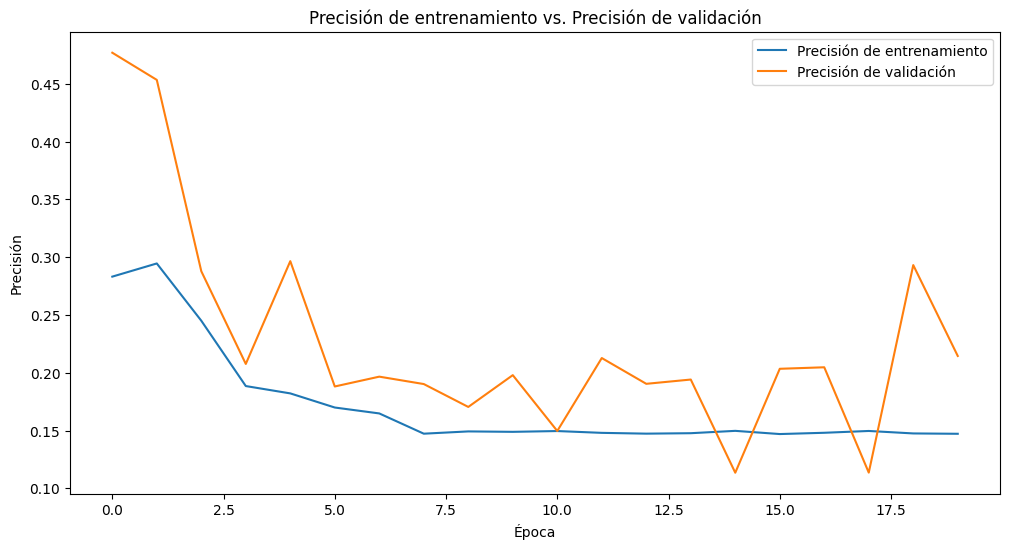

In [15]:
learning_rate = 0.01
epochs = 20
batch_size = 30
# neuronas = 100

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 255 #estaba dividiendo /225
x_testv /= 255

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

# Grafica la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs. Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento vs. Precisión de validación')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()